In [2]:
!pip install torchsummary


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# !pip install kaggle --upgrade


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# !pip show kaggle
# !kaggle config view

Name: kaggle
Version: 1.6.14
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: C:\Users\Yoo Hyunwoo\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 
Configuration values from C:\Users\Yoo Hyunwoo\.kaggle
- username: yhwoo7
- path: None
- proxy: None
- competition: None


# Import Stuff & Setup

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchsummary import summary
import warnings
import os
import sys
from tqdm import tqdm
import cv2

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [7]:
RESOLUTION = 64

In [8]:
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [9]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
    # transforms.Lambda(lambda x: x / 255.),
    transforms.Resize((RESOLUTION, RESOLUTION))
])


# Utils

In [10]:
def plot_image_from_list(__images, __labels, __count):
    plt.figure(figsize=(10, 10))
    for _i in range(__count[0] * __count[1]):
        plt.subplot(__count[0], __count[1], _i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        _img = __images[_i].to("cpu").numpy()
        plt.imshow(_img, cmap= "gray")
        plt.xlabel(__labels[_i])
    plt.show()

In [11]:
def plot_randomly_form_dataset(__dataset):
    images = []
    labels = []
    for _ in range(0, 25):
        index = torch.randint(0, len(__dataset), (1,)).item()
        image, label = __dataset[index]
        images.append(image.squeeze())
        labels.append(__dataset.label_id2str(label.item()))
    
    plot_image_from_list(images, labels, (5, 5))
        

In [12]:
def plot_randomly_form_dataset_model(__dataset, __model):
    images = []
    labels = []
    for _ in range(0, 25):
        index = torch.randint(0, len(__dataset), (1,)).item()
        image, label = __dataset[index]
        images.append(image.squeeze())
        result = model(image.unsqueeze(dim=0).to(device)).squeeze().cpu().argmax()
        
        labels.append(__dataset.label_id2str(label.item()) + " -> " + __dataset.label_id2str(result.item()))
    
    plot_image_from_list(images, labels, (5, 5))
        

# Dataset

In [13]:
DATA_SOURCE = {
    "Abuse": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-1\Abuse",
    "Arrest": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-1\Arrest",
    "Arson": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-1\Arson",
    "Assault": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-1\Assault",
    "Burglary": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-2\Burglary",
    "Explosion": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-2\Explosion",
    "Fighting": "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-2\Fighting",
    "Normal" : "E:\\kaggle\\input\\crimeufcdataset\\Anomaly_Dataset\\Anomaly_Videos\\Normal-Videos-Part-1"
}

In [14]:
import os

# 파일 경로를 설정합니다.
directory_path = "E:\kaggle\input\crimeufcdataset\Anomaly_Dataset\Anomaly_Videos\Anomaly-Videos-Part-1\Abuse"

# 경로가 존재하는지 확인합니다.
if os.path.exists(directory_path):
    print("경로가 존재합니다.")
    # 디렉터리 내의 파일 목록을 출력합니다.
    print("디렉터리 내용:", os.listdir(directory_path))
else:
    print("지정된 경로를 찾을 수 없습니다.")


경로가 존재합니다.
디렉터리 내용: ['Abuse001_x264.mp4', 'Abuse002_x264.mp4', 'Abuse003_x264.mp4', 'Abuse004_x264.mp4', 'Abuse005_x264.mp4', 'Abuse006_x264.mp4', 'Abuse007_x264.mp4', 'Abuse008_x264.mp4', 'Abuse009_x264.mp4', 'Abuse010_x264.mp4', 'Abuse011_x264.mp4', 'Abuse012_x264.mp4', 'Abuse013_x264.mp4', 'Abuse014_x264.mp4', 'Abuse015_x264.mp4', 'Abuse016_x264.mp4', 'Abuse017_x264.mp4', 'Abuse018_x264.mp4', 'Abuse019_x264.mp4', 'Abuse020_x264.mp4', 'Abuse021_x264.mp4', 'Abuse022_x264.mp4', 'Abuse023_x264.mp4', 'Abuse024_x264.mp4', 'Abuse025_x264.mp4', 'Abuse026_x264.mp4', 'Abuse027_x264.mp4', 'Abuse028_x264.mp4', 'Abuse029_x264.mp4', 'Abuse030_x264.mp4', 'Abuse031_x264.mp4', 'Abuse032_x264.mp4', 'Abuse033_x264.mp4', 'Abuse034_x264.mp4', 'Abuse035_x264.mp4', 'Abuse036_x264.mp4', 'Abuse037_x264.mp4', 'Abuse038_x264.mp4', 'Abuse039_x264.mp4', 'Abuse040_x264.mp4', 'Abuse041_x264.mp4', 'Abuse042_x264.mp4', 'Abuse043_x264.mp4', 'Abuse044_x264.mp4', 'Abuse045_x264.mp4', 'Abuse046_x264.mp4', 'Abuse047_x26

In [15]:
class CrimeDataset(Dataset):
    def __init__(self, __train=True, __tain_test_split=0.95, __random_state=42):
        torch.manual_seed(__random_state)
        
        self._data = []
        self._labels = []
        self._inclusion_probability = __tain_test_split if __train else 1.0 - __tain_test_split
        self._frame_interval = 30
        
        print(f"Loading {'train' if __train else 'test' } dataset...")
        for label, data_path in DATA_SOURCE.items():
            print(f"Loading Label {label}...")
            for file in tqdm(os.listdir(data_path)):
                if file.endswith(".mp4") and torch.rand(1).item() <= self._inclusion_probability:
                    path = os.path.join(data_path, file)
                    data, labels = self._parse_file(path, label)
                    self._data.extend(data)
                    self._labels.extend(labels)
        print(f"Finished loading {'train' if __train else 'test' } dataset... Loaded  {len(self._data)} images.")
    
    def _parse_file(self, __path, __label):
        if not os.path.exists(__path):
            return [], []
        
        data = []
        labels = []
        
        cap = cv2.VideoCapture(__path)
        
        success, image = cap.read()
        while success:
            try:
                if True:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
                    Y, U, V = cv2.split(image)
                    image = transformer(Y)
                    data.append(image)
                    labels.append(__label)
            except Exception as e:
                print(f"Error loading file {__path}: {e}")
            
            count = 0
            while success and count < self._frame_interval:
                success, image = cap.read()
                count += 1
        return data, labels
        
    
    def label_str2id(self, __label):
        labels = DATA_SOURCE.keys()
        return list(labels).index(__label)

    def label_id2str(self, __label):
        labels = DATA_SOURCE.keys()
        return list(labels)[__label]
        
    def __len__(self):
        return len(self._labels)

    def __getitem__(self, __idx):
        data = self._data[__idx]
        label = self._labels[__idx]
        return data, torch.tensor([self.label_str2id(label)])

In [16]:
train_dataset = CrimeDataset(True)
test_dataset = CrimeDataset(False)

Loading train dataset...
Loading Label Abuse...


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:34<00:00,  1.44it/s]


Loading Label Arrest...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.03s/it]


Loading Label Arson...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:44<00:00,  1.11it/s]


Loading Label Assault...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.60it/s]


Loading Label Burglary...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.61it/s]


Loading Label Explosion...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:36<00:00,  1.37it/s]


Loading Label Fighting...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.33it/s]


Loading Label Normal...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:32<00:00,  1.62it/s]


Finished loading train dataset... Loaded  80542 images.
Loading test dataset...
Loading Label Abuse...


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 185.68it/s]


Loading Label Arrest...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 23.42it/s]


Loading Label Arson...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.17it/s]


Loading Label Assault...


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 354.96it/s]


Loading Label Burglary...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.39it/s]


Loading Label Explosion...


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 207.98it/s]


Loading Label Fighting...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.62it/s]


Loading Label Normal...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 61.10it/s]

Finished loading test dataset... Loaded  3089 images.


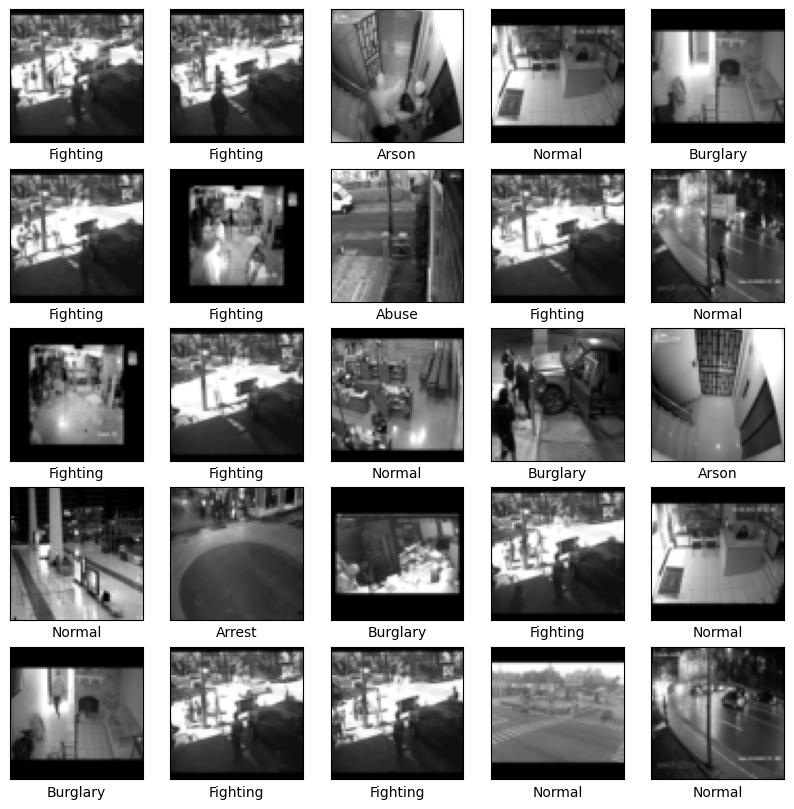

In [17]:
plot_randomly_form_dataset(test_dataset)

In [18]:
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=True)

# Model

In [19]:
class CrimeModelCNN(nn.Module):
    def __init__(self):
        super(CrimeModelCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding="same")
        self.leaky_relu = nn.LeakyReLU(0.1)
        self.max_pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding="same")
        self.max_pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding="same")
        self.max_pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.4)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16384, 256)
        self.dropout4 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.leaky_relu(x)
        x = self.max_pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.leaky_relu(x)
        x = self.max_pool2(x)
        x = self.dropout2(x)
        x = self.conv3(x)
        x = self.leaky_relu(x)
        x = self.max_pool3(x)
        x = self.dropout3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.leaky_relu(x)
        x = self.dropout4(x)
        return x

In [20]:
class CrimeModelLSTM(nn.Module):
    def __init__(self):
        super(CrimeModelLSTM, self).__init__()
        self.lstm1 = nn.LSTM(1, 8, batch_first=True, bidirectional=False)
        self.lstm2 = nn.LSTM(8, 8, batch_first=True, bidirectional=False)
        self.fc = nn.Linear(8, 4)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]
        x = self.fc(x)
        x = self.dropout(x)
        return x

In [21]:
# CNN과 LSTM을 동시에 사용하는 모델
class CrimeModel(nn.Module):
    def __init__(self):
        super(CrimeModel, self).__init__()
        self.cnn = CrimeModelCNN()
        self.lstm = CrimeModelLSTM()
        self.fc = nn.Linear(260, 8)  # Adjust the input size according to your concatenation axis
        self.fc2 = nn.Linear(256, 8)

    def forward(self, x):
        x_cnn = x
        x_lstm = torch.reshape(x, (x.shape[0], RESOLUTION * RESOLUTION, 1))
        x_cnn = self.cnn(x_cnn)
        x_lstm = self.lstm(x_lstm)
        x_combined = torch.cat((x_cnn, x_lstm), dim=1)
        x = self.fc(x_combined)
#         return F.softmax(x, dim=1)
        x_ful = self.fc2(x_cnn)
        return x

In [ ]:
# CNN만 사용하는 모델
class CrimeModel(nn.Module):
    def __init__(self):
        super(CrimeModel, self).__init__()
        self.cnn = CrimeModelCNN()
        self.lstm = CrimeModelLSTM()
        self.fc = nn.Linear(260, 8)  # Adjust the input size according to your concatenation axis
        self.fc2 = nn.Linear(256, 8)

    def forward(self, x):
        x_cnn = x
        x_lstm = torch.reshape(x, (x.shape[0], RESOLUTION * RESOLUTION, 1))
        x_cnn = self.cnn(x_cnn)
        x_lstm = self.lstm(x_lstm)
        x_combined = torch.cat((x_cnn, x_lstm), dim=1)
        x = self.fc(x_combined)
#         return F.softmax(x, dim=1)
        x_ful = self.fc2(x_cnn)
        return x_ful

In [22]:
model = CrimeModel()
test1 = CrimeModelCNN()
test2 = CrimeModelLSTM()

In [23]:
x = torch.rand(64,1,64,64)
y = torch.reshape(x, (x.shape[0], RESOLUTION * RESOLUTION, 1))
x_cnn = test1(x)
y_lstm = test2(y)
print("X_cnn: ", x_cnn.shape)
print("y_lstm: ", y_lstm.shape)
z = torch.cat((x_cnn, y_lstm), dim=1)
print("Z : ",z.shape)
print(model(x).shape)

X_cnn:  torch.Size([64, 256])
y_lstm:  torch.Size([64, 4])
Z :  torch.Size([64, 260])
torch.Size([64, 8])


# Training

In [24]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [25]:
model = nn.DataParallel(model)
model.to(device)

DataParallel(
  (module): CrimeModel(
    (cnn): CrimeModelCNN(
      (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (leaky_relu): LeakyReLU(negative_slope=0.1)
      (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (dropout1): Dropout(p=0.25, inplace=False)
      (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (dropout2): Dropout(p=0.25, inplace=False)
      (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (max_pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (dropout3): Dropout(p=0.4, inplace=False)
      (flatten): Flatten(start_dim=1, end_dim=-1)
      (fc1): Linear(in_features=16384, out_features=256, bias=True)
      (dropout4): Dropout(p=0.5, inplace=False)
    )
    (lstm): CrimeModelLSTM(
      (lstm1): LSTM

In [26]:
NUM_EPOCHS = 10

In [27]:
for g in optimizer.param_groups:
    g['lr'] = 0.001

In [28]:
total_batches = len(train_loader)
for epoch in range(NUM_EPOCHS):
    model.train()
    _total_correct = 0
    
    print(f"Epoch : {epoch}...")
    
    for batch_idx, (data, label) in enumerate(train_loader):
        print(f"Batch : {batch_idx + 1}/{total_batches}\t\t", end="\r")
        
        data = data.to(device)
        label = label.to(device)
        
        preds = model(data)
        
#         print(preds.shape, label.shape)
#         print(label)
        
        loss = criterion(preds, label.squeeze())
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print(f"Loss: {loss.item()}, Batch: {batch_idx + 1}/{total_batches}")

Epoch : 0...
Loss: 2.0936765670776367, Batch: 1/158
Loss: 1.9732201099395752, Batch: 11/158
Loss: 1.742653489112854, Batch: 21/158
Loss: 1.4781062602996826, Batch: 31/158
Loss: 1.3636471033096313, Batch: 41/158
Loss: 1.135396122932434, Batch: 51/158
Loss: 0.9530068039894104, Batch: 61/158
Loss: 0.8298845887184143, Batch: 71/158
Loss: 0.7080920934677124, Batch: 81/158
Loss: 0.6337372064590454, Batch: 91/158
Loss: 0.6561294794082642, Batch: 101/158
Loss: 0.5249566435813904, Batch: 111/158
Loss: 0.44565948843955994, Batch: 121/158
Loss: 0.4153687059879303, Batch: 131/158
Loss: 0.37595683336257935, Batch: 141/158
Loss: 0.317205011844635, Batch: 151/158
Epoch : 1...158		
Loss: 0.3808659613132477, Batch: 1/158
Loss: 0.2718178331851959, Batch: 11/158
Loss: 0.26931285858154297, Batch: 21/158
Loss: 0.3357744514942169, Batch: 31/158
Loss: 0.23241835832595825, Batch: 41/158
Loss: 0.21200257539749146, Batch: 51/158
Loss: 0.20045572519302368, Batch: 61/158
Loss: 0.20765811204910278, Batch: 71/158
L

In [29]:
torch.save(model, "model.pt")

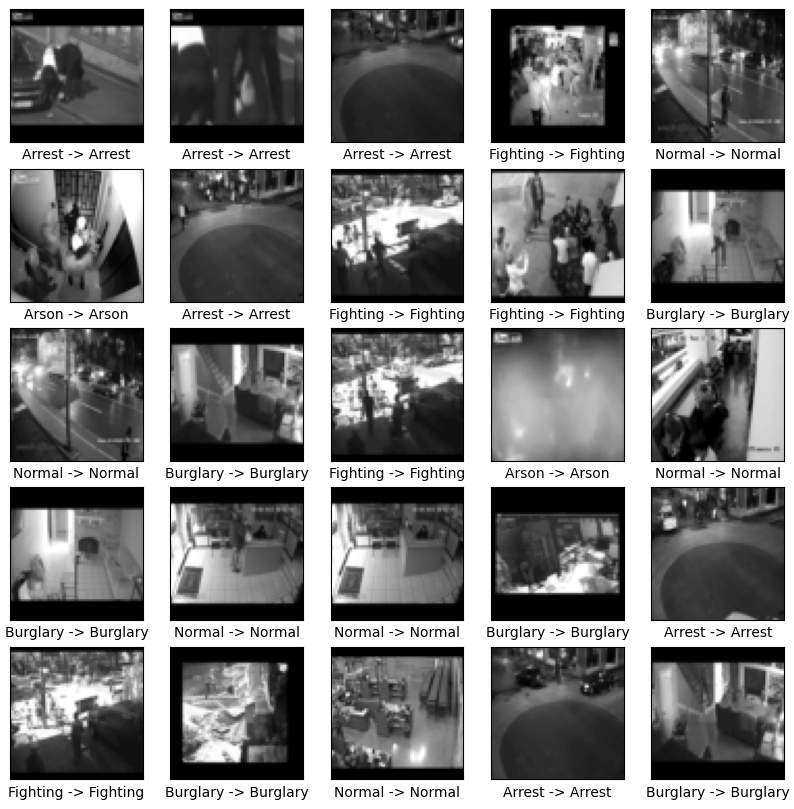

In [30]:
plot_randomly_form_dataset_model(test_dataset, model)

In [31]:
# 연습용
print(os.getcwd())
import torch
import torch.nn as nn

# 드롭아웃 레이어 정의
dropout = nn.Dropout(p=0.5)  # 드롭아웃 확률을 50%로 설정

# 입력 텐서 정의 (예시)
input_tensor = torch.randn(5, 5)

# 드롭아웃 적용
output_tensor = dropout(input_tensor)

print(output_tensor)


E:\
tensor([[-0.0000,  0.0000,  0.0000,  1.5498, -3.8352],
        [-0.0000,  0.1479,  2.8549,  0.0000, -2.7700],
        [ 0.0000, -0.0000, -1.4729,  0.0000, -0.0000],
        [-0.0000, -0.0000,  1.9864,  0.6248, -0.0000],
        [-0.0000,  2.6576, -0.0000,  0.0000, -0.2664]])
